In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv', index_col='id')
test = pd.read_csv('../data/test.csv', index_col='id')
submission = pd.read_csv('../data/sample_submission.csv', index_col='id')

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def df_preview(df):
    for col in df.columns:
        print(col, "null count ::", df[col].isnull().sum(), "// mean ::", df[col].mean())

def df_col_distplot(df):
    for col in df.columns:
        print(col, "plot")
        sns.distplot(df.loc[df[col].notnull(), col])
        plt.title(col)
        plt.show()

def rmse_expm1(pred, true):
    return -np.sqrt(np.mean((np.expm1(pred)-np.expm1(true))**2))

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

In [4]:
## concat_df: train, test 를 합친 dataframe

concat_df = pd.concat([train, test])
concat_df.shape

(20000, 75)

In [5]:
## feature_df: target 을 제외한 dataframe

target_cols = ['hhb', 'hbo2', 'ca', 'na']
feature_df = concat_df.drop(target_cols, axis=1)

In [6]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(objective='regression', num_iterations=10**3)

In [20]:
feature_dst = feature_df.filter(regex='_dst$', axis=1)
feature_dst

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
id,,,,,,,,,,,,,,,,,,,,,
0,2.447758e-18,1.894578e-18,0.000000e+00,6.412913e-18,1.098559e-17,8.907142e-19,NaN,0.000000e+00,NaN,0.000000e+00,...,NaN,3.527371e-18,NaN,6.455564e-19,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17
1,0.000000e+00,0.000000e+00,0.000000e+00,1.995530e-10,1.025259e-10,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,...,2.647633e-09,NaN,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN
2,1.677445e-19,3.763590e-20,NaN,0.000000e+00,NaN,NaN,8.981651e-19,1.944683e-19,8.126907e-19,2.183200e-19,...,4.629125e-18,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN
3,4.044975e-11,NaN,5.345363e-11,9.106886e-12,1.881458e-11,3.617201e-11,7.909656e-13,NaN,1.583839e-10,NaN,...,1.274876e-10,6.118947e-11,NaN,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN
4,4.784751e-14,NaN,0.000000e+00,1.153089e-13,0.000000e+00,0.000000e+00,1.056991e-13,0.000000e+00,0.000000e+00,2.666663e-14,...,0.000000e+00,NaN,1.537619e-14,4.996522e-14,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000e+00,1.059879e-13,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,...,7.889599e-13,NaN,4.903209e-13,1.365078e-12,7.929664e-13,0.000000e+00,0.000000e+00,1.472213e-13,1.479745e-12,5.391520e-12
19996,0.000000e+00,0.000000e+00,5.283427e-19,3.519532e-19,0.000000e+00,NaN,0.000000e+00,0.000000e+00,4.359929e-18,NaN,...,1.240848e-17,6.258180e-18,8.693704e-20,NaN,4.514449e-18,NaN,9.128300e-19,NaN,3.928314e-18,2.586781e-17
19997,1.452606e-15,4.033172e-15,2.832304e-15,0.000000e+00,0.000000e+00,NaN,NaN,2.593115e-13,1.187968e-13,0.000000e+00,...,0.000000e+00,NaN,0.000000e+00,2.610282e-14,7.789652e-15,NaN,1.271388e-15,1.436617e-15,0.000000e+00,1.743751e-13


In [15]:
## KNNImputer 를 사용함
## n_neighbors = 2

from sklearn.impute import KNNImputer

imputer_n10 = KNNImputer(n_neighbors=10)
imputer_n2 = KNNImputer(n_neighbors=2)

In [21]:
imputed_df = imputer_n10.fit_transform(feature_dst)

In [22]:
## impute 결과가 list 로 나오기 때문에 dataframe 으로 바꿔주는 작업
imputed_df = pd.DataFrame(imputed_df, columns=feature_dst.columns, index=list(feature_dst.index.values))

In [24]:
target_cols = ['hhb', 'hbo2', 'ca', 'na']

for col_name in target_cols:
    imputed_df[col_name] = concat_df[col_name]

imputed_train = imputed_df[imputed_df['hhb'].notnull()]
imputed_test = imputed_df[imputed_df['hhb'].isnull()]

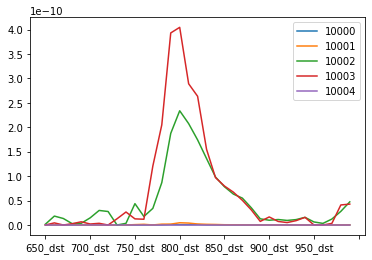

In [25]:
imputed_test.filter(regex='_dst$', axis=1).head().T.plot()

In [33]:
feature_df.update(imputed_df)
feature_df

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
id,,,,,,,,,,,,,,,,,,,,,
0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,0.96333,...,4.460940e-19,0.000000e+00,6.758651e-19,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,7.007540e-11,9.710091e-09,1.941268e-10,0.00,2.83,7.25,4.64
2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,0.25584,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,9.191620e-18,10.64,3.00,8.40,5.16
3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,0.79865,...,2.245998e-10,1.299511e-10,7.782625e-11,8.104387e-11,4.088921e-10,4.328699e-10,5.67,4.01,5.05,4.35
4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,1.01564,...,1.457955e-13,8.769053e-14,3.158150e-14,1.330237e-13,2.935644e-13,1.220232e-12,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,15,0.04334,0.03279,0.05853,0.04070,0.07704,0.07859,0.06168,0.08903,0.08833,...,7.929664e-13,0.000000e+00,0.000000e+00,1.472213e-13,1.479745e-12,5.391520e-12,NaN,NaN,NaN,NaN
19996,25,0.00020,0.02009,0.01726,0.03816,0.08300,0.08681,0.15300,0.18099,0.24377,...,4.514449e-18,4.303978e-19,9.128300e-19,9.794723e-19,3.928314e-18,2.586781e-17,NaN,NaN,NaN,NaN
19997,15,0.00000,0.00000,0.00120,0.00000,0.04347,0.14882,0.40883,0.80365,1.01179,...,7.789652e-15,9.960274e-16,1.271388e-15,1.436617e-15,0.000000e+00,1.743751e-13,NaN,NaN,NaN,NaN


In [32]:
target_cols = ['hhb', 'hbo2', 'ca', 'na']

for col_name in target_cols:
    feature_df[col_name] = concat_df[col_name]

feature_train = feature_df[feature_df['hhb'].notnull()]
feature_test = feature_df[feature_df['hhb'].isnull()]

In [43]:
dont_need_scale_cols = ['rho', 'hhb', 'hbo2', 'ca', 'na']
droped_df = feature_df.drop(dont_need_scale_cols, axis=1)

In [44]:
std_scaler = StandardScaler()
std_scaler.fit(droped_df)
scaled_feature = std_scaler.transform(droped_df)
scaled_feature = pd.DataFrame(scaled_feature, columns=droped_df.columns, index=list(droped_df.index.values))

In [47]:
for col_name in dont_need_scale_cols:
    scaled_feature[col_name] = concat_df[col_name]

scaled_feature

,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,740_src,...,950_dst,960_dst,970_dst,980_dst,990_dst,rho,hhb,hbo2,ca,na
0,0.733433,0.786592,0.951760,0.963029,1.133476,1.207972,1.298452,1.453511,1.435435,1.509874,...,-0.187506,-0.156014,-0.177652,-0.225913,-0.234685,25,5.59,4.32,8.92,4.29
1,-0.662554,-0.707615,-0.693873,-0.800497,-0.850550,-0.848762,-0.951857,-1.019855,-1.083122,-1.116091,...,27.836351,13.676561,0.124317,19.210914,-0.039139,10,0.00,2.83,7.25,4.64
2,-0.662554,-0.593307,-0.674131,-0.689131,-0.679612,-0.651741,-0.556629,-0.529055,-0.414247,-0.352500,...,-0.187506,-0.156014,-0.177652,-0.225913,-0.234685,25,10.64,3.00,8.40,5.16
3,0.349141,0.379545,0.323864,0.465586,0.512360,0.572584,0.779221,0.923532,1.004891,1.246377,...,0.408260,0.349273,0.171582,0.592572,0.201351,10,5.67,4.01,5.05,4.35
4,3.071887,2.798157,2.485780,2.249688,2.126834,1.939869,1.742492,1.574877,1.572196,1.475166,...,-0.187104,-0.155809,-0.177079,-0.225325,-0.233456,15,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.503128,-0.593655,-0.561602,-0.674941,-0.625168,-0.684088,-0.793826,-0.784652,-0.852190,-0.869908,...,-0.187506,-0.156014,-0.177017,-0.222951,-0.229254,15,NaN,NaN,NaN,NaN
19996,-0.661818,-0.637793,-0.696722,-0.682777,-0.607732,-0.661087,-0.547008,-0.541709,-0.445803,-0.298040,...,-0.187506,-0.156014,-0.177652,-0.225913,-0.234685,25,NaN,NaN,NaN,NaN
19997,-0.662554,-0.707615,-0.749303,-0.800497,-0.723378,-0.487571,0.144445,1.103256,1.562130,1.338243,...,-0.187501,-0.156006,-0.177646,-0.225913,-0.234510,15,NaN,NaN,NaN,NaN
19998,-0.353929,-0.509861,-0.480078,-0.420311,-0.478424,-0.435804,-0.470005,-0.391996,-0.262009,-0.116770,...,-0.187506,-0.156014,-0.177652,-0.225913,-0.234685,20,NaN,NaN,NaN,NaN


In [48]:
scaled_train = scaled_feature[scaled_feature['hhb'].notnull()]
scaled_test = scaled_feature[scaled_feature['hhb'].isnull()]

In [49]:
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 551)

In [50]:
import lightgbm as lgb

feature_col = scaled_train.columns.drop(['hhb', 'hbo2', 'ca', 'na'])
target_col_list = ['hhb', 'hbo2', 'ca', 'na']
submission = pd.read_csv('../data/sample_submission.csv', index_col='id')

for target_col in target_col_list:
    print("target_col :: ",target_col)
    for n_fold, (trn_idx, val_idx) in enumerate(folds.split(scaled_train)):
        x_data = scaled_train[feature_col]
        y_data = scaled_train[target_col]

        train_X, train_y = x_data.iloc[trn_idx], y_data.iloc[trn_idx] 
        valid_X, valid_y = x_data.iloc[val_idx], y_data.iloc[val_idx]

        train_ds = lgb.Dataset(train_X, label=train_y)
        valid_ds = lgb.Dataset(valid_X, label=valid_y)

        params = {
            'objective':'regression', 
            'num_iterations':10**3, 
            'n_estimators': 2000,
            'metric': 'rmse',
        }

        model = lgb.train(
            params=params, 
            train_set=train_ds, 
            valid_sets=valid_ds, 
            verbose_eval=2000, 
            early_stopping_rounds=100 
        )

        test_x = scaled_test[feature_col]
        test_pred = model.predict(test_x)
        submission[target_col] = submission[target_col] + test_pred

target_col ::  hhb
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 1.17799
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[973]	valid_0's rmse: 1.18063
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[881]	valid_0's rmse: 1.20419
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[959]	valid_0's rmse: 1.1541
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 1.19192
target_col ::  hbo2
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[962]	valid_0's rmse: 0.794807
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[638]	valid_0's rmse: 0.802681
Train

In [52]:
submission = submission / 5
submission

,hhb,hbo2,ca,na
id,,,,
10000,9.110375,4.316054,9.298209,3.582886
10001,6.430364,3.463407,8.280902,2.838301
10002,9.991575,5.163981,10.186593,4.033043
10003,8.004431,4.026302,10.725143,3.337254
10004,6.683569,3.216114,8.964640,3.850423
...,...,...,...,...
19995,4.692212,3.848528,11.937528,3.344614
19996,11.213295,3.163609,7.867273,2.125401
19997,8.526836,3.623970,7.447262,3.600121


In [53]:
import time
filename = time.strftime('%Y-%m-%d-%H_%M_%S')+'submission.csv'
submission.to_csv(filename, index=True)